### CA1 – Machine Learning HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Machine-Learning)

### 1.1 Importing libraries

Importing the required libraries "`pandas`" to start the project.

Also importing "`numpy`", "`seaborn`", "`matplotlib.pyplot`" and "`sklearn.decomposition`", in case it needs other libraries it will be imported when necessary it comes.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

### 1.2	Loading Data from a CSV File

Loading the dataset using the function “`.read_csv`” to import the required data existing in the Comma-separated values "`.csv`" file in the `df` variable.

In [2]:
df = pd.read_csv("HPM04.20240406T220445.csv")

### 1.3	Inspecting the Data Set

The first command useful to start understanding the data is “`.head()`” to check the first 5 observations as default and features contained in the data frame after loaded. 

This command was important and necessary to get the first impression of it, returning that this dataset has **5** rows (observations) and **14** columns (features).

In [3]:
df.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C03346V04033,Dwelling Status,C03349V04063,Eircode Output,C03341V04028,Stamp Duty Event,C03344V04031,Type of Buyer,UNIT,VALUE
0,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,-,All Buyer Types,Number,3519.0
1,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,02,Household Buyer - First-Time Buyer Owner-Occupier,Number,1181.0
2,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,03,Household Buyer - Former Owner-Occupier,Number,1803.0
3,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,04,Household Buyer - Non-Occupier,Number,535.0
4,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,2,Executions,-,All Buyer Types,Number,2884.0


Thereafter using the command “`shape`” shows us the complete body of the data, in this case **336000** observations and **14** features to be analysed.

In [4]:
df.shape

(336000, 14)

Used “```.info()```” next to print a concise summary of a data frame.

Getting this information it was necessary to learn the names of features existing and the difference between the total of observations shown before in the “`shape`” command and their respective data types.

In [5]:
# df.info()

The "`.describe()`" function shows us a little more about each feature, we can see statistics information about: count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max 

In [6]:
# df.describe()

In [7]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C03346V04033',
       'Dwelling Status', 'C03349V04063', 'Eircode Output', 'C03341V04028',
       'Stamp Duty Event', 'C03344V04031', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

### 1.4 Checking the types of data

In [8]:
df.dtypes

STATISTIC            object
Statistic Label      object
TLIST(M1)             int64
Month                object
C03346V04033         object
Dwelling Status      object
C03349V04063         object
Eircode Output       object
C03341V04028          int64
Stamp Duty Event     object
C03344V04031         object
Type of Buyer        object
UNIT                 object
VALUE               float64
dtype: object

In [10]:
df['Type of Buyer'].unique()

array(['All Buyer Types',
       'Household Buyer - First-Time Buyer Owner-Occupier',
       'Household Buyer - Former Owner-Occupier',
       'Household Buyer - Non-Occupier'], dtype=object)

## 2. Data Preparation

### 2.1 Finding Unique Values

- Keeping the columns:  STATISTIC, TLIST(M1), Month, C03346V04033, C03349V04063, Eircode Output, C03341V04028, C03344V04031, UNIT and VALUE

In [11]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C03346V04033',
       'Dwelling Status', 'C03349V04063', 'Eircode Output', 'C03341V04028',
       'Stamp Duty Event', 'C03344V04031', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

In [12]:
df['Type of Buyer'].unique()

array(['All Buyer Types',
       'Household Buyer - First-Time Buyer Owner-Occupier',
       'Household Buyer - Former Owner-Occupier',
       'Household Buyer - Non-Occupier'], dtype=object)

'Dwelling Status ID', 'Eircode ID', 'Type of Buyer ID' with '-' values 

### 2.2 Replacing Values (Syntax errors)

- STATISTIC - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- C03346V04033 - 1: All Dwelling Statuses, 2: New and 3: Existing
- C03341V04028 - 1: Filings and 2: Executions
- C03344V04031 - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [13]:
df['STATISTIC'] = df['STATISTIC'].replace(["HPM04C01", 'HPM04C02', 'HPM04C03', 'HPM04C04'], [1, 2, 3, 4])
df['C03346V04033'] = df['C03346V04033'].replace(["-", '01', '02'], [1, 2, 3])
df['C03349V04063'] = df['C03349V04063'].replace(["-"], ["All"])
df['C03344V04031'] = df['C03344V04031'].replace(["-", '02', '03', '04'], [1, 2, 3, 4])

In [14]:
df.head(5)

,STATISTIC,Statistic Label,TLIST(M1),Month,C03346V04033,Dwelling Status,C03349V04063,Eircode Output,C03341V04028,Stamp Duty Event,C03344V04031,Type of Buyer,UNIT,VALUE
0,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,1,Filings,1,All Buyer Types,Number,3519.0
1,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,1,Filings,2,Household Buyer - First-Time Buyer Owner-Occupier,Number,1181.0
2,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,1,Filings,3,Household Buyer - Former Owner-Occupier,Number,1803.0
3,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,1,Filings,4,Household Buyer - Non-Occupier,Number,535.0
4,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,2,Executions,1,All Buyer Types,Number,2884.0


### 2.3 Dropping Irrelevant Columns

- Dropping:  Statistic Label, Dwelling Status, Stamp Duty Event and Type of Buyer

In [15]:
df = df.drop(columns = ['Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer'])

In [16]:
df.head()

,STATISTIC,TLIST(M1),Month,C03346V04033,C03349V04063,Eircode Output,C03341V04028,C03344V04031,UNIT,VALUE
0,1,202201,2022 January,1,All,All,1,1,Number,3519.0
1,1,202201,2022 January,1,All,All,1,2,Number,1181.0
2,1,202201,2022 January,1,All,All,1,3,Number,1803.0
3,1,202201,2022 January,1,All,All,1,4,Number,535.0
4,1,202201,2022 January,1,All,All,2,1,Number,2884.0


### 2.4 Renaming Columns

- Renaming: STATISTIC to Statistic, TLIST(M1) to Year/Month, C03346V04033 to Dwelling Status, C03349V04063 to Eircode, C03341V04028 to Stamp Duty Event, C03344V04031 to Type of Buyer, UNIT to Unit, VALUE to Price

In [17]:
df = df.rename(columns= {'STATISTIC': 'Statistic', 'TLIST(M1)': 'Year/Month', 'C03346V04033': 'Dwelling Status', 'C03349V04063': 'Eircode', 'C03341V04028': 'Stamp Duty Event', 'C03344V04031': 'Type of Buyer', 'UNIT': 'Unit', 'VALUE': 'Price'})

In [18]:
df.head()

,Statistic,Year/Month,Month,Dwelling Status,Eircode,Eircode Output,Stamp Duty Event,Type of Buyer,Unit,Price
0,1,202201,2022 January,1,All,All,1,1,Number,3519.0
1,1,202201,2022 January,1,All,All,1,2,Number,1181.0
2,1,202201,2022 January,1,All,All,1,3,Number,1803.0
3,1,202201,2022 January,1,All,All,1,4,Number,535.0
4,1,202201,2022 January,1,All,All,2,1,Number,2884.0


### 2.5 Handling Missing Values

In [19]:
df.isnull().sum()

Statistic               0
Year/Month              0
Month                   0
Dwelling Status         0
Eircode                 0
Eircode Output          0
Stamp Duty Event        0
Type of Buyer           0
Unit                    0
Price               40562
dtype: int64

In [20]:
df[df['Price'].isnull()].head()

,Statistic,Year/Month,Month,Dwelling Status,Eircode,Eircode Output,Stamp Duty Event,Type of Buyer,Unit,Price
168008,3,202201,2022 January,1,A41,A41: Ballyboughal,1,1,Euro,NaN
168009,3,202201,2022 January,1,A41,A41: Ballyboughal,1,2,Euro,NaN
168010,3,202201,2022 January,1,A41,A41: Ballyboughal,1,3,Euro,NaN
168011,3,202201,2022 January,1,A41,A41: Ballyboughal,1,4,Euro,NaN
168013,3,202201,2022 January,1,A41,A41: Ballyboughal,2,2,Euro,NaN


### 2.6 Imputing Missing Values

### 2.7 Handling Duplicates Rows

In [21]:
df[df.duplicated()].shape

(0, 10)

In [22]:
df.count()

Statistic           336000
Year/Month          336000
Month               336000
Dwelling Status     336000
Eircode             336000
Eircode Output      336000
Stamp Duty Event    336000
Type of Buyer       336000
Unit                336000
Price               295438
dtype: int64

### 2.8 Type Conversion

In [23]:
df.dtypes

Statistic             int64
Year/Month            int64
Month                object
Dwelling Status       int64
Eircode              object
Eircode Output       object
Stamp Duty Event      int64
Type of Buyer         int64
Unit                 object
Price               float64
dtype: object

In [24]:
df.head(2)

,Statistic,Year/Month,Month,Dwelling Status,Eircode,Eircode Output,Stamp Duty Event,Type of Buyer,Unit,Price
0,1,202201,2022 January,1,All,All,1,1,Number,3519.0
1,1,202201,2022 January,1,All,All,1,2,Number,1181.0


### 2.9 Relationships

In [25]:
# df.columns

,Statistic,Year/Month,Dwelling Status,Stamp Duty Event,Type of Buyer,Price
Statistic,1.000000e+00,-8.597654e-12,1.543649e-14,-2.572692e-14,-1.168811e-14,0.713562
Year/Month,-8.597654e-12,1.000000e+00,-1.795593e-13,-2.664970e-17,-5.436912e-15,0.013605
Dwelling Status,1.543649e-14,-1.795593e-13,1.000000e+00,-9.395965e-18,-1.655645e-16,-0.014121
Stamp Duty Event,-2.572692e-14,-2.664970e-17,-9.395965e-18,1.000000e+00,-7.542177e-19,-0.001298
Type of Buyer,-1.168811e-14,-5.436912e-15,-1.655645e-16,-7.542177e-19,1.000000e+00,-0.085167
Price,7.135622e-01,1.360489e-02,-1.412076e-02,-1.298153e-03,-8.516661e-02,1.000000


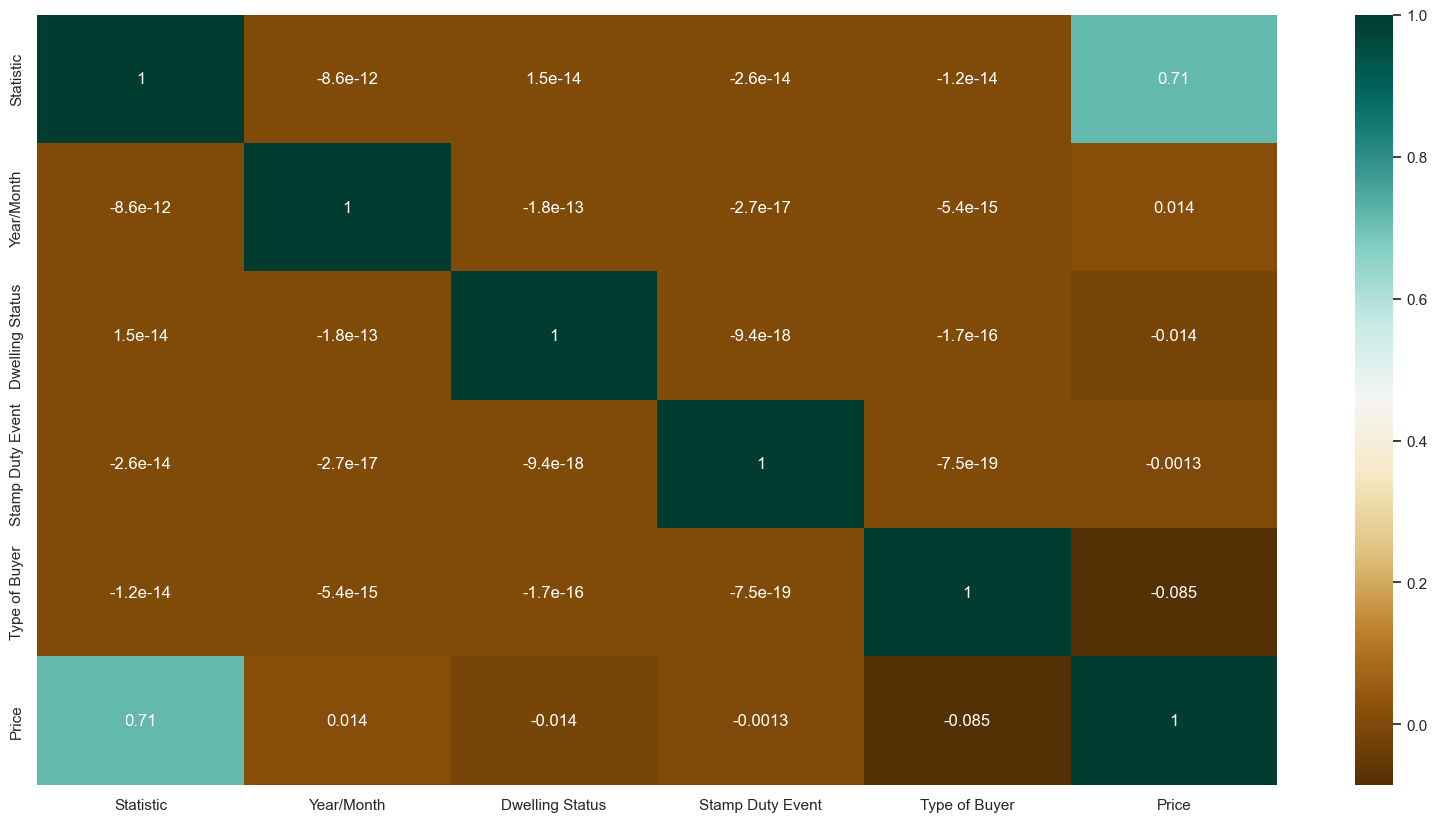

In [28]:
df_numeric = df.select_dtypes(include = ['number'])

plt.figure(figsize = (20, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

<Axes: xlabel='Statistic', ylabel='Price'>

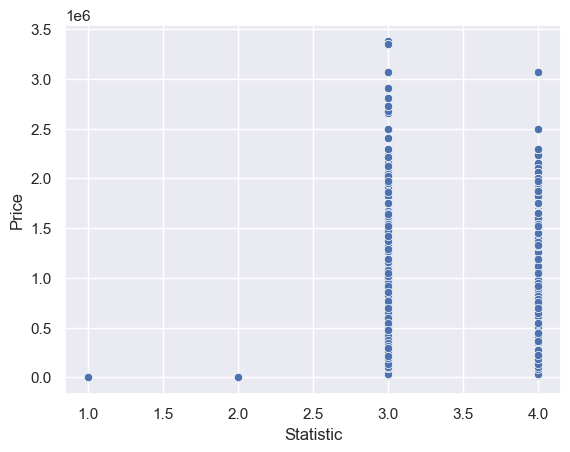

In [32]:
sns.scatterplot(data = df, x = "Statistic", y = "Price")

### DATA DICTIONARY

**STATISTIC -> Statistic ID:**
- HPM04C01: Volume of Sales (Number)
- HPM04C02: Value of Sales (Euro Million)
- HPM04C03: Mean Sale Price (Euro)
- HPM04C04: Median Price (Euro)

**Statistic Label**
- Volume of Sales: Volume of Sales (Number)
- Value of Sales: Value of Sales (Euro Million)
- Mean Sale Price: Mean Sale Price (Euro)
- Median Price: Median Price (Euro)

**TLIST(M1) -> Year Month**
- Range from 2022-Jan to 2024-Jan: "202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401"

**Month**
- Rage from 2022 Janeiro to 2024 Janeiro: "'2022 January', '2022 February', '2022 March', '2022 April', '2022 May', '2022 June', '2022 July', '2022 August', '2022 September', '2022 October', '2022 November', '2022 December', '2023 January', '2023 February', '2023 March', '2023 April', '2023 May', '2023 June', '2023 July', '2023 August', '2023 September', '2023 October', '2023 November', '2023 December', '2024 January'"

**C03346V04033 -> Dwelling Status ID**
- '-' - All Dwelling Statuses
- 01 - New
- 02 - Existing

**Dwelling Status**
- All Dwelling Statuses
- New
- Existing

**C03349V04063 -> Eircode ID**
- '-' - All 
- 'A41', 'A42', 'A45', 'A63', 'A67', 'A75', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A91', 'A92', 'A94', 'A96', 'A98', 'C15', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D20', 'D22', 'D24', 'D6W', 'E21', 'E25', 'E32', 'E34', 'E41', 'E45', 'E53', 'E91', 'F12', 'F23', 'F26', 'F28', 'F31', 'F35', 'F42', 'F45', 'F52', 'F56', 'F91', 'F92', 'F93', 'F94', 'H12', 'H14', 'H16', 'H18', 'H23', 'H53', 'H54', 'H62', 'H65', 'H71', 'H91', 'K32', 'K34', 'K36', 'K45', 'K56', 'K67', 'K78', 'N37', 'N39', 'N41', 'N91', 'P12', 'P14', 'P17', 'P24', 'P25', 'P31', 'P32', 'P36', 'P43', 'P47', 'P51', 'P56', 'P61', 'P67', 'P72', 'P75', 'P81', 'P85', 'R14', 'R21', 'R32', 'R35', 'R42', 'R45', 'R51', 'R56', 'R93', 'R95', 'T12', 'T23', 'T34', 'T45', 'T56', 'V14', 'V15', 'V23', 'V31', 'V35', 'V42', 'V92', 'V93', 'V94', 'V95', 'W12', 'W23', 'W34', 'W91', 'X35', 'X42', 'X91', 'Y14', 'Y21', 'Y25', 'Y34', 'Y35'

**Eircode Output -> Eircode**
- 'All'
- Eircodes

**C03341V04028 - Stamp Duty Event ID**
- 1: Filings
- 2: Executions

**Stamp Duty Event** 
- Filings
- Executions

**C03344V04031 -> Type of Buyer ID** 
- '-' - All Buyer Types
- 02 - Household Buyer - First-Time Buyer Owner-Occupier
- 03 - Household Buyer - Former Owner-Occupier
- 04 - Household Buyer - Non-Occupier

**Type of Buyer** 
- All Buyer Types
- Household Buyer - First-Time Buyer Owner-Occupier
- Household Buyer - Former Owner-Occupier
- Household Buyer - Non-Occupier

**UNIT -> Unit**
- Number
- Euro Million
- Euro

**VALUE -> Price**
Price of the property